### Imorting all basic Libraries

In [111]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

### Importing the Dataset

In [112]:
df =pd.read_csv(r'C:\Users\DELL\Downloads\census_income.csv')
df.head() 

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [113]:
### Checking the dataset shape
df.shape

(32560, 15)

In [114]:
### Checking the null values 
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [115]:
df.sample(5) ### Checking that is there any misstyping

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32173,44,Self-emp-not-inc,157217,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,42,United-States,<=50K
17612,51,Self-emp-inc,258735,HS-grad,9,Divorced,Protective-serv,Not-in-family,White,Male,0,0,81,United-States,<=50K
2380,17,Private,317681,11th,7,Never-married,Craft-repair,Own-child,White,Male,0,0,10,United-States,<=50K
25648,37,Private,189674,Bachelors,13,Separated,Exec-managerial,Unmarried,Black,Female,0,0,40,United-States,<=50K
312,36,Self-emp-not-inc,205607,Bachelors,13,Divorced,Prof-specialty,Not-in-family,Black,Female,0,0,40,United-States,>50K


### There are some question mark in some column. I will check and replace according to the values the column has.

In [116]:
df.isin([" ?"]).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [117]:
df=df.replace(" ?", np.nan) ### Replacing the ? with nan.

In [118]:
df.isin([" ?"]).sum() ### rechecking the dataset again

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [119]:
### Checking the null values again.
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

### There are three columns which has null values and these column has categorical values. So, I will fill these null values with mode.

In [120]:
df['Workclass']=df['Workclass'].fillna(df['Workclass'].mode()[0])
df['Occupation']=df['Occupation'].fillna(df['Occupation'].mode()[0])
df['Native_country']=df['Native_country'].fillna(df['Native_country'].mode()[0])

In [121]:
### The null values is filled, lets check again the null values. 
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

### Now dataset is free from null values and dataset is ready to proceed furher.

## EAD

In [122]:
### Importing the basic visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


<AxesSubplot:xlabel='Income', ylabel='count'>

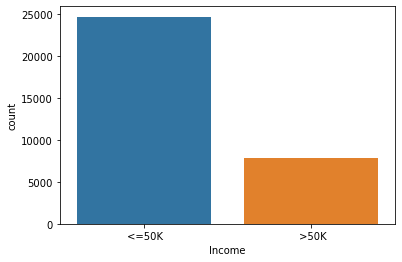

In [123]:
print(df['Income'].value_counts())
sns.countplot(x='Income', data=df)

### Conclusion- The cpount of people who has income more than 50k is less.

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


<AxesSubplot:xlabel='Workclass', ylabel='count'>

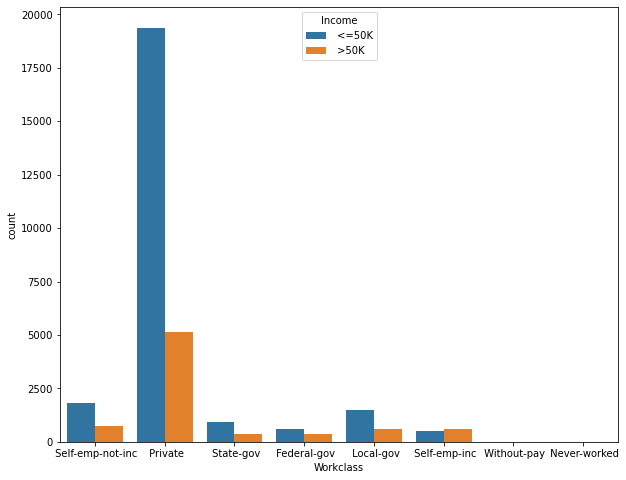

In [124]:
print(df['Workclass'].value_counts())
plt.figure(figsize=(10,8))
sns.countplot(x='Workclass', data=df, hue='Income', orient='h')

### Conclusion-The private workclass has more effect on Income. 

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


<AxesSubplot:xlabel='Education', ylabel='count'>

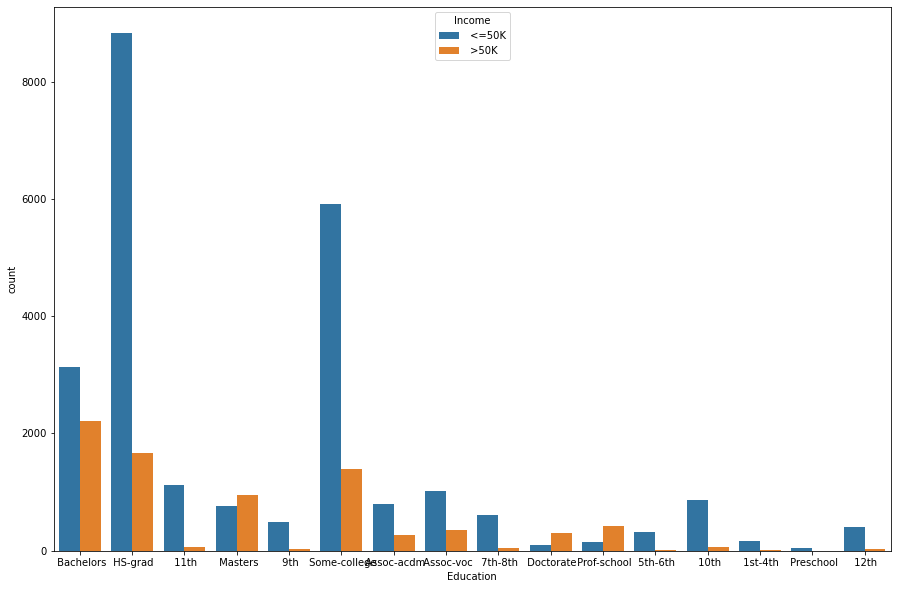

In [125]:
print(df['Education'].value_counts())
plt.figure(figsize=(15,10))
sns.countplot(x='Education', data=df, hue='Income')

### Conclusion-The HS-grad and some-college has more effect on Income compared to the other.

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64


<AxesSubplot:xlabel='Education_num', ylabel='count'>

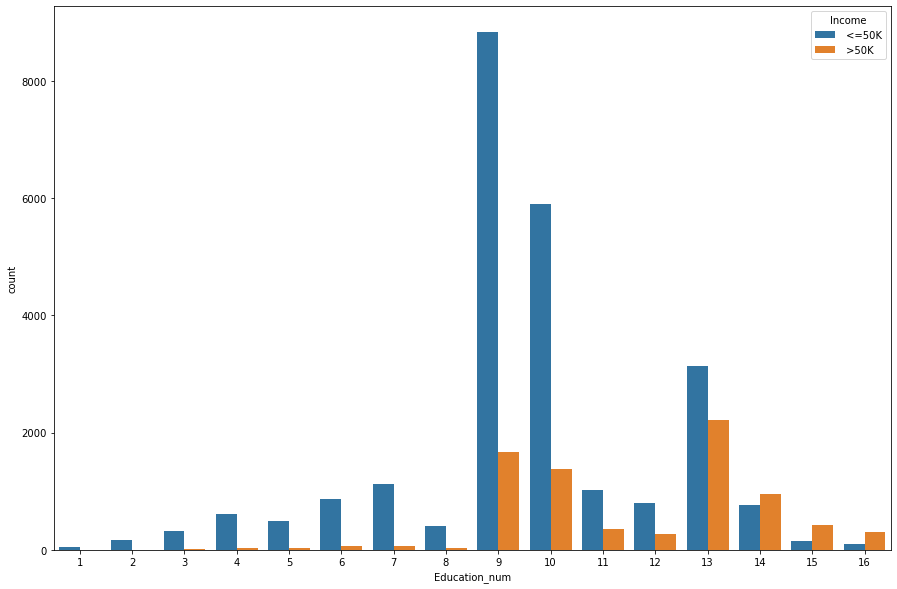

In [126]:
print(df['Education_num'].value_counts())
plt.figure(figsize=(15,10))
sns.countplot(x='Education_num', data=df, hue='Income')

### Concluion-The 9 number has more effect on Income compared to the other but the people with 13 number has income more than 50k compared to other numbers.

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


<AxesSubplot:xlabel='Marital_status', ylabel='count'>

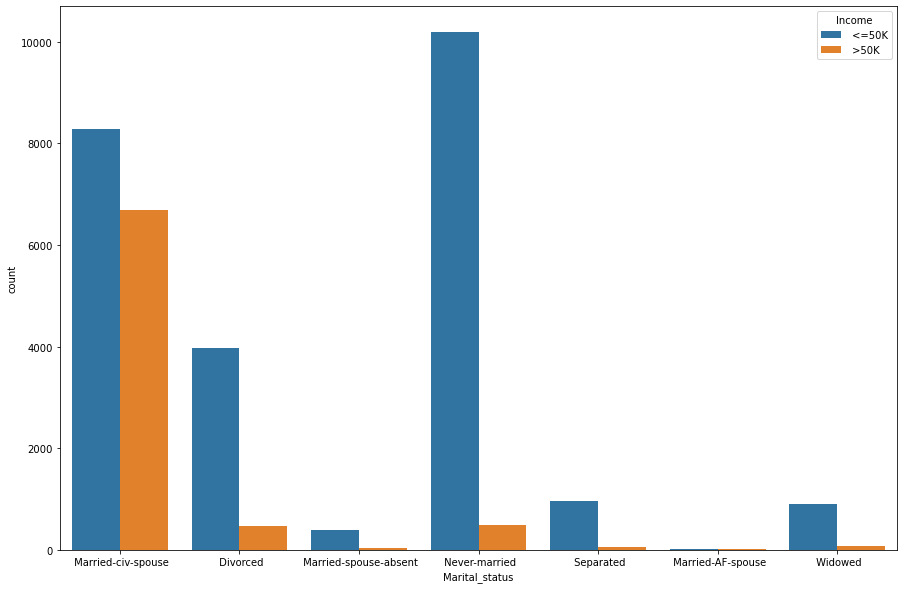

In [127]:
print(df['Marital_status'].value_counts())
plt.figure(figsize=(15,10))
sns.countplot(x='Marital_status', data=df, hue='Income')

### Concluion-Married people has more impact on Income but Never married people has more count of less than 50k income.

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


<AxesSubplot:xlabel='Occupation', ylabel='count'>

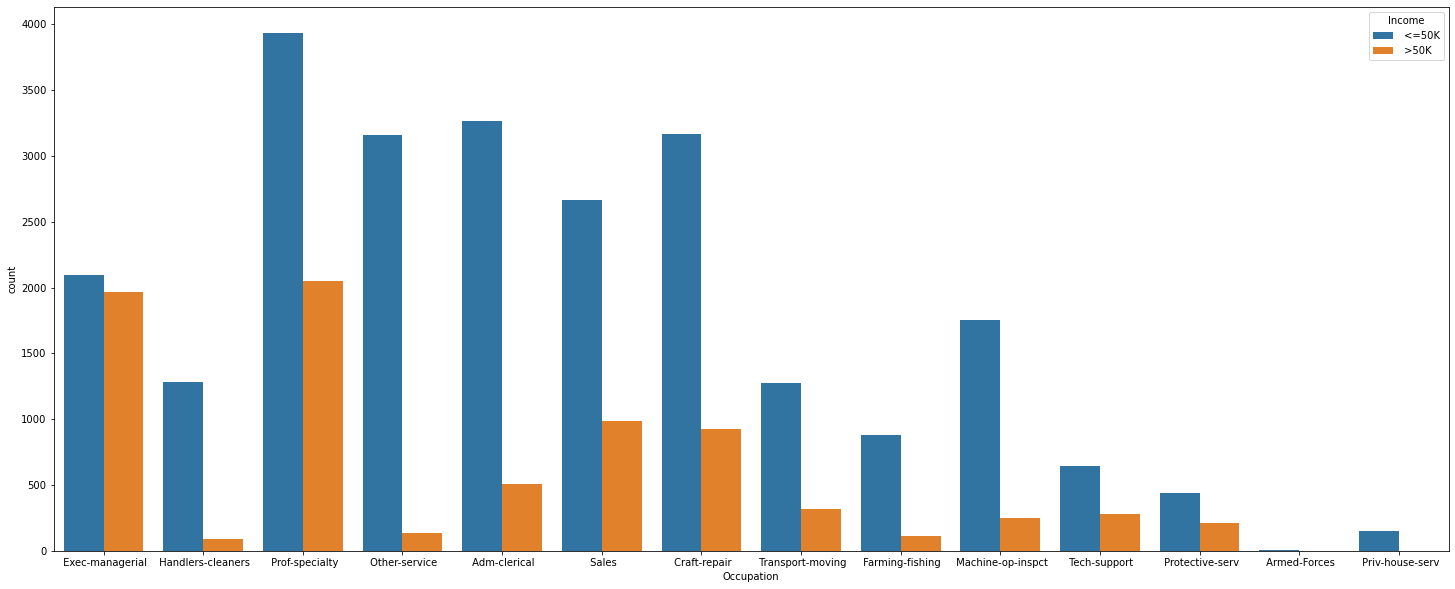

In [128]:
print(df['Occupation'].value_counts())
plt.figure(figsize=(25,10))
sns.countplot(x='Occupation', data=df, hue='Income')

### Concluion-Exec-managerial and Prof-specialty people has more impact on Income but Prof-specialty has more count of less than 50k income.

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


<AxesSubplot:xlabel='Relationship', ylabel='count'>

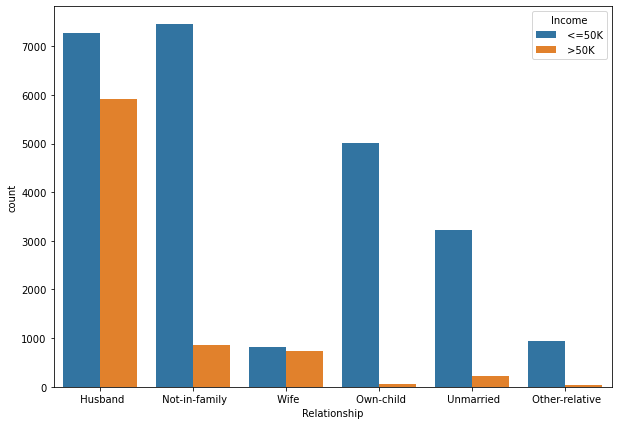

In [129]:
print(df['Relationship'].value_counts())
plt.figure(figsize=(10,7))
sns.countplot(x='Relationship', data=df, hue='Income')

### Concluion-Husband relation has more impact on Income but not-in-family has more count of less than 50k income.

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


<AxesSubplot:xlabel='Race', ylabel='count'>

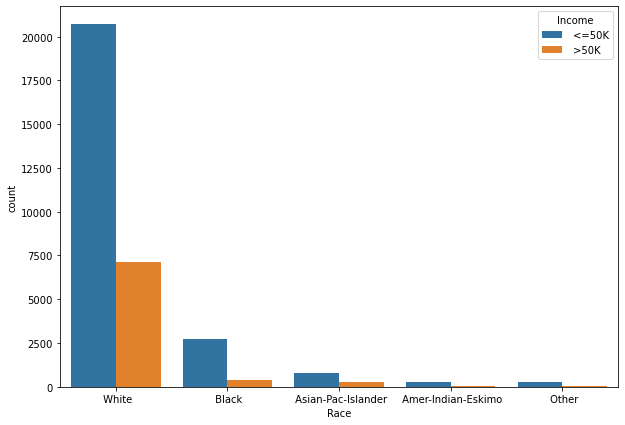

In [130]:
print(df['Race'].value_counts())
plt.figure(figsize=(10,7))
sns.countplot(x='Race', data=df, hue='Income')

### Concluion-White Race people more impact on Income compared to the other races.

 Male      21789
 Female    10771
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

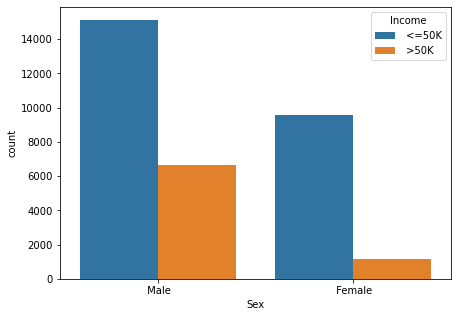

In [131]:
print(df['Sex'].value_counts())
plt.figure(figsize=(7,5))
sns.countplot(x='Sex', data=df, hue='Income')

### Concluion-Male sex more impact on Income compared to the female.

### Rest of column has more value or continuous values. So, I will check their relations with target values in scatter plot.

### Now convert the object values into integer with lable incoder.

In [132]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [133]:
###Importing the Labelencoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col] = le.fit_transform(df[col])

In [134]:
df.dtypes ## Again cheking the the datatype to cofirm the datatype

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

In [135]:
### All the column are integer form. Now dataset is ready to perform further plotting

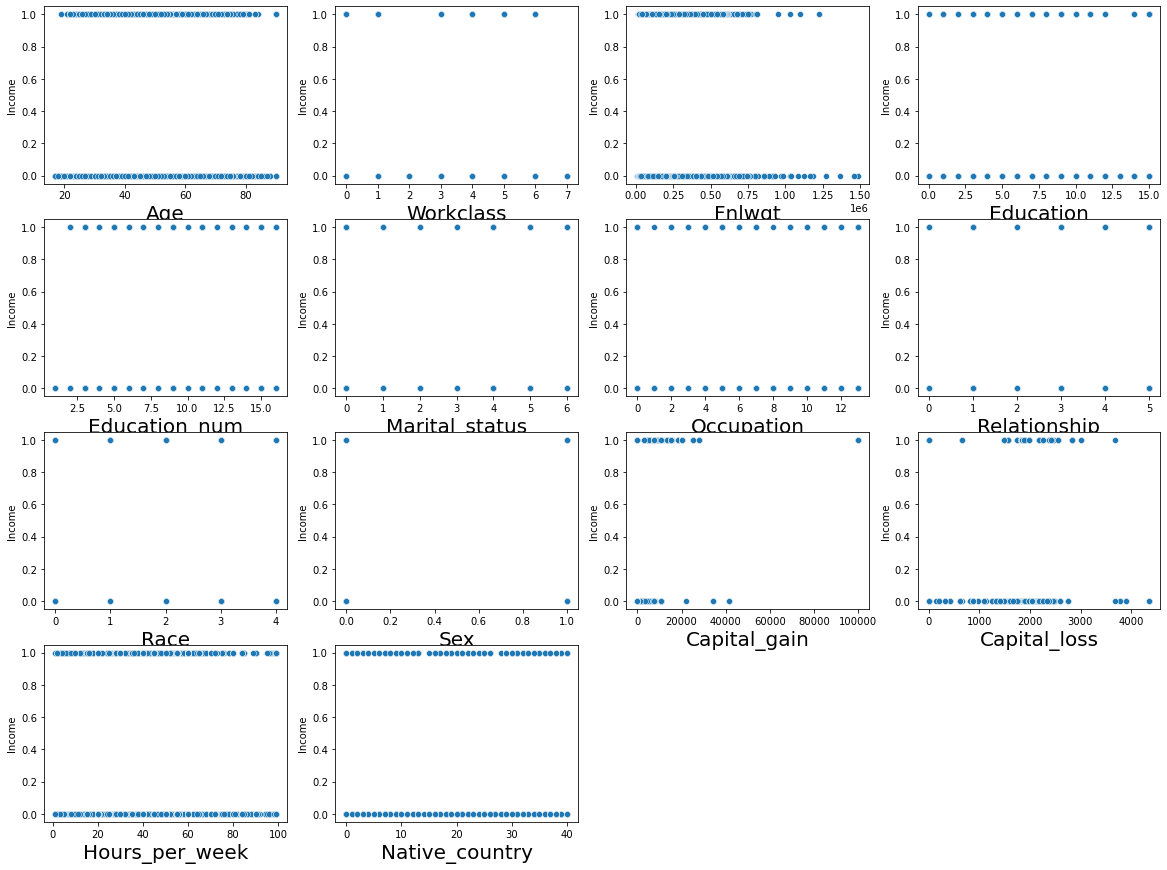

In [136]:
x=df.drop(columns='Income')
y=df['Income']
plt.figure(figsize=(20,15))
pn=1
for column in x:
    if pn <= 16:
        plt.subplot(4,4, pn)
        sns.scatterplot(x[column],y )
        plt.xlabel(column, fontsize= 20)
    pn+=1
plt.show()

In [137]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

## Conclusion -

#### Income has normal trend with Age.
#### Income has good trend with Workclass.
#### Income has normal trend with Fnlwgt.
#### Income has good trend with Education.
#### Income has good trend with Education_num.
#### Income has good trend with Marital_status.
#### Income has good trend with Race.
#### Income has good trend with Sex.
#### Income has normal trend with Capital_gain.
#### Income has normal trend with Capital_loss.
#### Income has good trend with Native_country.

### I can say from above conclusion that all the feature are directly related to Income feature. 

## Checking the multicolinearity. 

<function matplotlib.pyplot.show(close=None, block=None)>

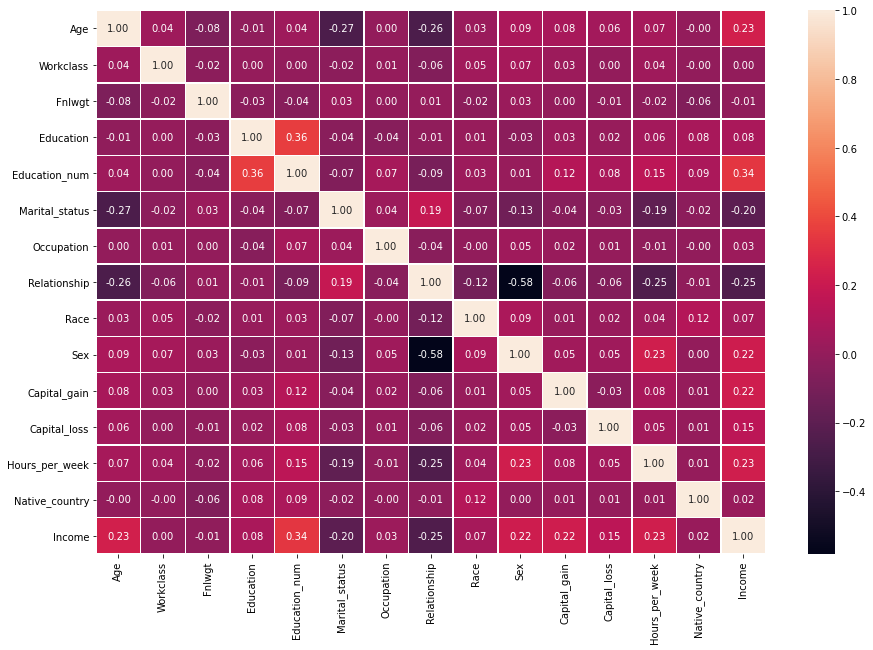

In [141]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=0.5)
plt.show

### No feature has strong multicollinearity with each other the maximum multicollinearity percentage is 34% which is acceptable. So,I will not drop any features. 

### The target has maximum trend with - Education_num(34%)
### The target has minimum trend with - Workclass(0%)

### Most of features has normal trend with Target. So, I will keep all feature for Model building.

### Checking the stats of the dataset with Heatmap

<function matplotlib.pyplot.show(close=None, block=None)>

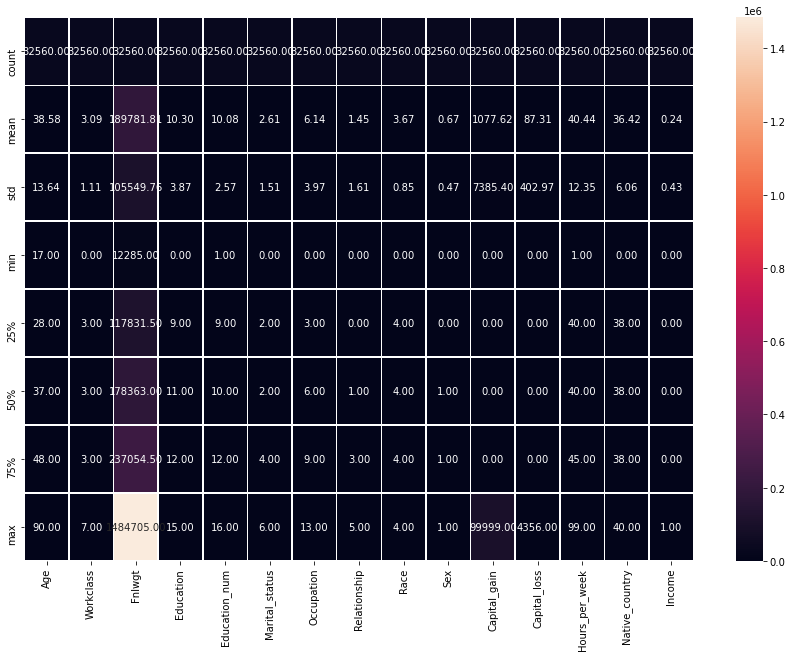

In [142]:
plt.figure(figsize=(15,10))
sns.heatmap(df.describe(), annot=True, fmt='.2f', linewidths=0.5)
plt.show

In [143]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.094349,1.897818e+05,10.298249,10.080590,2.611794,6.138943,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.417107,0.240817
std,13.640642,1.107094,1.055498e+05,3.870317,2.572709,1.506225,3.972623,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,6.056133,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783630e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.370545e+05,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


## All the stats seems normal expect Capital_gain and Capital_loss. There are only maximum value no, minimum, 25,50 and 75.I will check it and try to fix it.

In [153]:
df['Capital_gain'].value_counts() ### Its shows here there are more values in Capital_gain

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1639         1
5060         1
6097         1
1455         1
7978         1
Name: Capital_gain, Length: 119, dtype: int64

### Ploting the distplot to check the distribution of the dataset column

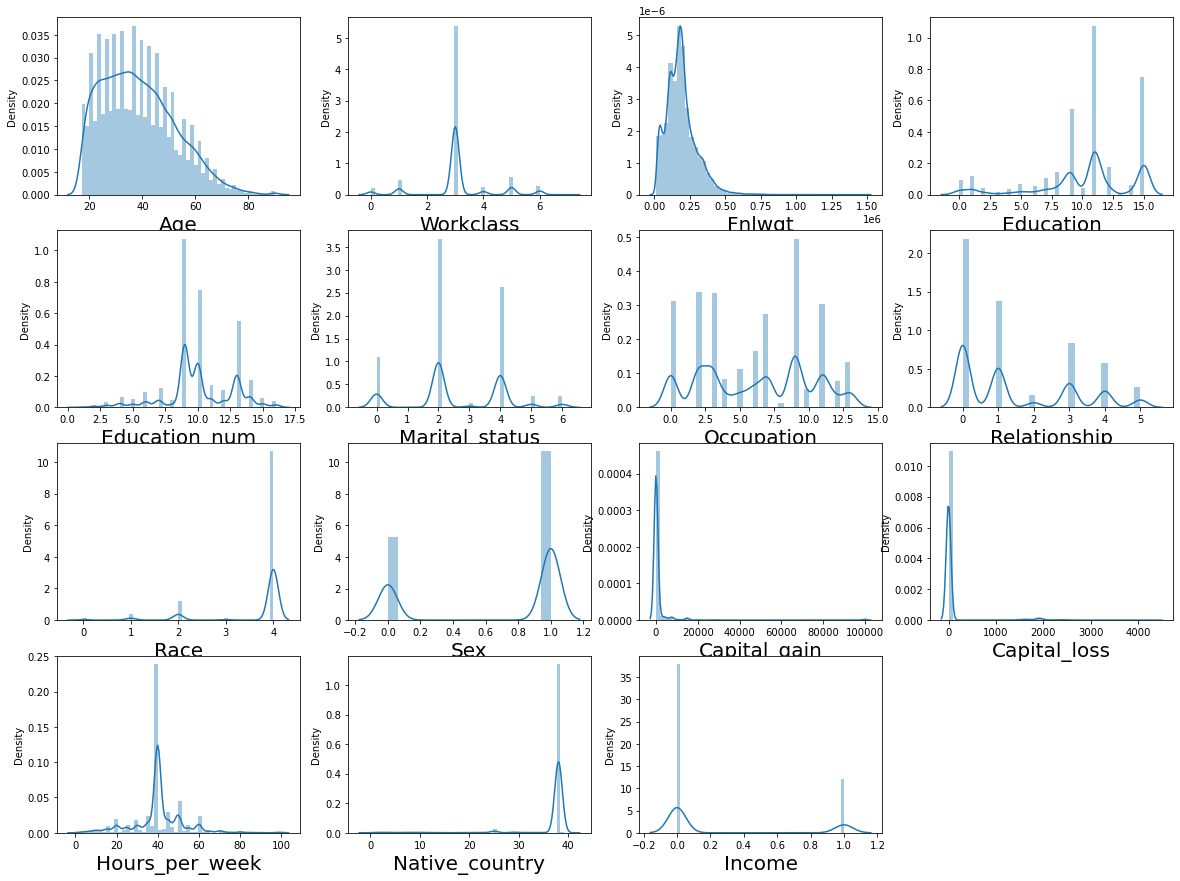

In [157]:
plt.figure(figsize=(20,15))
pn=1
for column in df:
    if pn <= 16:
        plt.subplot(4,4, pn)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize= 20)
    pn+=1
plt.show()

## Conclusion-

#### Age has normal distribution with little bit right skewed.
#### fnlwgt has normal distribution with right skewed.
#### Capital_gain also has normal distribution with right skewed.
#### Capital_loss also has normal distribution with right skewed.
#### Hours_per_week also has normal distribution with skeweness

### Rest of the features are categorical and continues values has skewness. I will deal with skewness with power transformer.

### Checking the skewness of the dataset

In [147]:
x=df.drop(columns='Income')
y=df['Income']
x.skew()

Age                0.558738
Workclass          0.076178
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.000536
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.243083
dtype: float64

### We can see there are 6 features which has skewness. Keeping the thresold value +/-0.5. I will fix this with help of power transform. 

In [148]:
from sklearn.preprocessing import power_transform ### Importing the power_tranform
x_new = power_transform(x)
x=pd.DataFrame(x_new, columns=x.columns)

In [149]:
x.skew()

Age              -0.013897
Workclass         0.216967
Fnlwgt            0.016914
Education        -0.309431
Education_num     0.023885
Marital_status   -0.114201
Occupation       -0.237163
Relationship      0.122917
Race             -2.010817
Sex              -0.719244
Capital_gain      3.016951
Capital_loss      4.299511
Hours_per_week    0.229556
Native_country   -2.981838
dtype: float64

### Almost skewness is removed but some features still has some skewness and i am not going remove these skewness further as keep model unbiased.

## Checking the Outliers

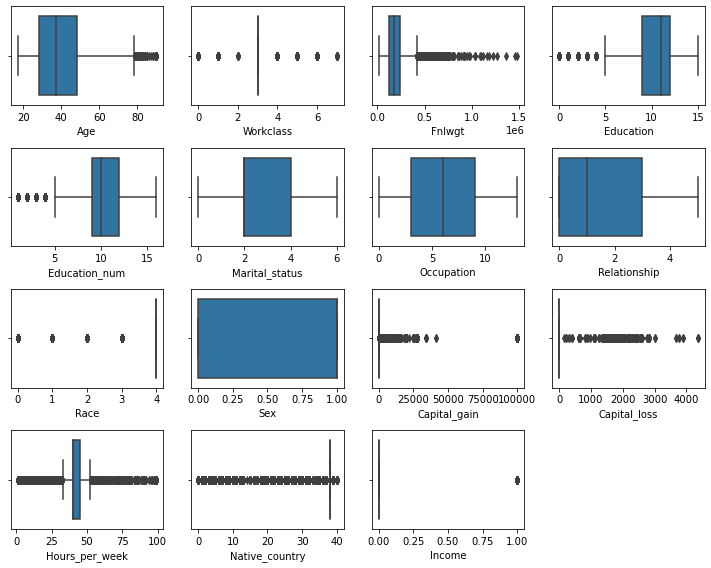

In [159]:
plt.figure(figsize=(10,8))
pn = 1
for column in df:
    if pn <= 16:
        ax = plt.subplot(4,4, pn)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize=10)
    pn+=1
plt.tight_layout()

### All features has outliers expect Marital_status, occupation, relationship and sex. I will remove these outliers with the help of zscore.

In [160]:
### Checking the shape of the dataset
df.shape

(32560, 15)

In [161]:
## Importing the z-score and apply to the data set.
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold = 3
np.where(z<3)

(array([    0,     0,     0, ..., 32559, 32559, 32559], dtype=int64),
 array([ 0,  1,  2, ..., 12, 13, 14], dtype=int64))

In [162]:
df_new = df[(z<3).all(axis=1)]
df_new.shape

(27770, 15)

In [163]:
### Dataloss
data_loss= (32560-27770)/32560*100
print("Data loss of the dataset", data_loss)

Data loss of the dataset 14.71130221130221


### There are lots of outliers are present in the dataset. So, I will accept the this Data loss of 14% and proceed further to build the model.

### I am all set to proceed to buil model. Seperating the dataset into the feature and target and importing the basic model building libraries. 

In [164]:
x= df_new.drop(columns="Income")
y=df_new["Income"]

In [165]:
### Importing some preprocesing library for model 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [166]:
### Scaling then feature with standard scaler 
sc = StandardScaler()
x_scaled= sc.fit_transform(x)

In [167]:
#### Splitting the dataset into traing data and testing data
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.20, random_state=25)
print(len(x_train), len(y_train), len(x_test), len(y_test))

22216 22216 5554 5554


In [168]:
### Importing the model building libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [169]:
### Importing the LogisticRegression and checking the score and cross validation score 
lr= LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
acc_lr =accuracy_score(y_test,pred_lr)
scr = cross_val_score(lr, x,y, cv=5)
Clas_r = classification_report(y_test,pred_lr)
con = confusion_matrix(y_test,pred_lr)
Corss_lr = scr.mean()

print("\n LogisticRegression Model Accuracy ",  '\nAccuracy_score for LogisticRegression model', acc_lr*100, "\n Cross Validation score is ",Corss_lr*100, '\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 LogisticRegression Model Accuracy  
Accuracy_score for LogisticRegression model 82.87720561757293 
 Cross Validation score is  80.23766654663305 
 Classification report is  
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      4292
           1       0.72      0.41      0.52      1262

    accuracy                           0.83      5554
   macro avg       0.78      0.68      0.71      5554
weighted avg       0.82      0.83      0.81      5554
 
 Confusion Metrix is 
 [[4086  206]
 [ 745  517]]


In [170]:
### Importing the RandomForestClassifier and  checking the score and cross validation score  
RFC= RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
acc_RFC =accuracy_score(y_test,pred_RFC)
scr = cross_val_score(RFC, x_scaled,y, cv=5)
Corss_rfc = scr.mean()
Clas_r = classification_report(y_test,pred_RFC)
con = confusion_matrix(y_test,pred_RFC)

print("\n RandomForestClassifier Model Accuracy",  '\n\nAccuracy_score for RandomForestClassifier model', acc_RFC*100, "\n Cross Validation score is ",Corss_rfc*100, '\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 RandomForestClassifier Model Accuracy 

Accuracy_score for RandomForestClassifier model 84.92978033849478 
 Cross Validation score is  85.20705797623333 
 Classification report is  
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      4292
           1       0.71      0.58      0.64      1262

    accuracy                           0.85      5554
   macro avg       0.79      0.75      0.77      5554
weighted avg       0.84      0.85      0.84      5554
 
 Confusion Metrix is 
 [[3988  304]
 [ 533  729]]


In [171]:
### Importing the DecisionTreeClassifier and checking the score and cross validation score  
DTC= DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred_DTC=DTC.predict(x_test)
acc_DTC =accuracy_score(y_test,pred_DTC)
scr = cross_val_score(DTC, x_scaled,y, cv=5)
Corss_dtc = scr.mean()
Clas_r = classification_report(y_test,pred_DTC)
con = confusion_matrix(y_test,pred_DTC)

print("\n DecisionTreeClassifier Model Accuracy",  '\n\nAccuracy_score for DecisionTreeClassifier model', acc_DTC*100, "\n Cross Validation score is ",Corss_dtc*100,'\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 DecisionTreeClassifier Model Accuracy 

Accuracy_score for DecisionTreeClassifier model 79.78033849477853 
 Cross Validation score is  80.50414115952466 
 Classification report is  
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      4292
           1       0.55      0.58      0.57      1262

    accuracy                           0.80      5554
   macro avg       0.71      0.72      0.72      5554
weighted avg       0.80      0.80      0.80      5554
 
 Confusion Metrix is 
 [[3699  593]
 [ 530  732]]


In [172]:
### Importing the KNeighborsClassifier and checking the score and cross validation score 
KNC= KNeighborsClassifier()
KNC.fit(x_train,y_train)
pred_KNC=KNC.predict(x_test)
acc_KNC =accuracy_score(y_test,pred_KNC)
scr = cross_val_score(KNC, x_scaled,y, cv=5)
Corss = scr.mean()
Clas_r = classification_report(y_test,pred_KNC)
con = confusion_matrix(y_test,pred_KNC)
print("\n KNeighborsClassifier Model Accuracy",  '\n\nAccuracy_score for KNeighborsClassifier model', acc_KNC*100, "\n Cross Validation score is ",Corss*100,'\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 KNeighborsClassifier Model Accuracy 

Accuracy_score for KNeighborsClassifier model 83.50738206697875 
 Cross Validation score is  83.51818509182571 
 Classification report is  
               precision    recall  f1-score   support

           0       0.88      0.91      0.89      4292
           1       0.65      0.59      0.62      1262

    accuracy                           0.84      5554
   macro avg       0.77      0.75      0.76      5554
weighted avg       0.83      0.84      0.83      5554
 
 Confusion Metrix is 
 [[3895  397]
 [ 519  743]]


In [173]:
### Importing the SVC and checking the score and cross validation score
svc= SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
acc_svc =accuracy_score(y_test,pred_svc)
scr = cross_val_score(svc, x_scaled,y, cv=5)
Corss = scr.mean()
Clas_r = classification_report(y_test,pred_svc)
con = confusion_matrix(y_test,pred_svc)
print("\n SVC Model Accuracy",  '\n\nAccuracy_score for SVC model', acc_svc*100,"\n Cross Validation score is ",Corss*100,'\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 SVC Model Accuracy 

Accuracy_score for SVC model 85.05581562837594 
 Cross Validation score is  85.0306085703997 
 Classification report is  
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      4292
           1       0.76      0.50      0.60      1262

    accuracy                           0.85      5554
   macro avg       0.81      0.73      0.76      5554
weighted avg       0.84      0.85      0.84      5554
 
 Confusion Metrix is 
 [[4091  201]
 [ 629  633]]


### I performed 5 model prediction Accuracy score, those score are mentioned below - 
 
#### Accuracy score and cross validation score for LogisticRegression model 82.87720561757293 and cross validation score is 80.23766654663305 
#### Accuracy score cross validation score for RandomForestClassifier model 84.92978033849478 and cross validation score is 85.20705797623333  
#### Accuracy score cross validation score for DecisionTreeClassifier model 79.78033849477853 and cross validation score is 80.50414115952466 
#### Accuracy score cross validation score for KNeighborsClassifier model 83.50738206697875 and cross validation score is 83.51818509182571
#### Accuracy score cross validation score  for SVC model 85.05581562837594 and cross validation score is 85.0306085703997

### From the above, I conclude that I will go forward with SupportVectorClassifier because the accuracy is good comparison to other model and aslo has very low difference with Cross validation score but we can do better hyperparameter tuning with SupportVectorClassifier. May the Accuracy will increase.


In [178]:
from sklearn.model_selection import GridSearchCV
sv= SVC()
param_grid = {"C":range(1,5),
            'gamma':['scale', 'auto']}

In [179]:
gridsearch = GridSearchCV(estimator=sv, param_grid=param_grid)
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': range(1, 5), 'gamma': ['scale', 'auto']})

In [180]:
gridsearch.best_params_

{'C': 4, 'gamma': 'scale'}

In [184]:
sv = SVC(C=2,gamma='auto')
sv.fit(x_train,y_train)
pred_sv=sv.predict(x_test)
acc_sv =accuracy_score(y_test,pred_sv)
scr = cross_val_score(sv, x_scaled,y, cv=5)
Corss = scr.mean()
Clas_r = classification_report(y_test,pred_sv)
con = confusion_matrix(y_test,pred_sv)
print("\n SVC Model Accuracy",  '\n\nAccuracy_score for SVC model', acc_sv*100,"\n Cross Validation score is ",Corss*100,'\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 SVC Model Accuracy 

Accuracy_score for SVC model 85.10983075261073 
 Cross Validation score is  85.01620453727044 
 Classification report is  
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      4292
           1       0.75      0.51      0.61      1262

    accuracy                           0.85      5554
   macro avg       0.81      0.73      0.76      5554
weighted avg       0.84      0.85      0.84      5554
 
 Confusion Metrix is 
 [[4079  213]
 [ 614  648]]


## Conclusion - I tried multiple times to increase the accuracy of the model but did not get better results. I am keeping the model without tuning model.

### Plot AUC - ROC curve

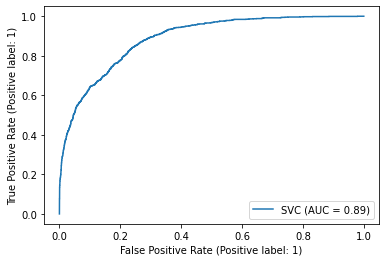

In [190]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svc,x_test,y_test)
plt.show()

### The roc curve is shows pretty good accuracy.

## Conclusion 

### I tried very much to increase the Accuracy and decrease the difference between accuracy and cross validaion but did not get better result. So, I am going to save this model with SVC model 85.05581562837594 and cross validation score is 85.0306085703997

## Saving the model

In [191]:
import joblib
joblib.dump(SVC, 'Census Income Project')

['Census Income Project']